In [1]:
import pandas as pd

df= pd.read_csv('final/cleaned_AIS_data.csv')

C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\2126499.py:3: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('final/cleaned_AIS_data.csv')


In [2]:
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,TransceiverClass,has_IMO,has_CallSign,VesselGroup,hour,day,month,day_of_week,week,transmission_interval
0,0,2023-04-02 19:08:58,49.29758,-123.03559,0.0,275.9,511.0,UNKNOWN,NaN,NaN,...,A,False,False,Not Available,19,2,4,6,13,NaN
1,9108431,2022-08-09 22:35:16,49.29482,-123.06083,6.9,81.4,81.0,UNKNOWN,NaN,NaN,...,B,False,False,Other,22,9,8,1,32,NaN
2,9108431,2022-08-09 22:37:57,49.29553,-123.05262,7.3,85.0,85.0,UNKNOWN,NaN,NaN,...,B,False,False,Other,22,9,8,1,32,161.0
3,9108431,2022-08-09 22:39:16,49.29597,-123.04853,7.6,92.5,92.0,UNKNOWN,NaN,NaN,...,B,False,False,Other,22,9,8,1,32,79.0
4,9108431,2022-08-09 22:41:35,49.29557,-123.04118,7.7,95.2,95.0,UNKNOWN,NaN,NaN,...,B,False,False,Other,22,9,8,1,32,139.0


In [4]:
# Group AIS data by each vessel (MMSI) and sort by time to create tracks
vessel_tracks = df.sort_values(by=['MMSI', 'BaseDateTime'])


vessel_tracks.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,TransceiverClass,has_IMO,has_CallSign,VesselGroup,hour,day,month,day_of_week,week,transmission_interval
0,0,2023-04-02 19:08:58,49.29758,-123.03559,0.0,275.9,511.0,UNKNOWN,NaN,NaN,...,A,False,False,Not Available,19,2,4,6,13,NaN
1,9108431,2022-08-09 22:35:16,49.29482,-123.06083,6.9,81.4,81.0,UNKNOWN,NaN,NaN,...,B,False,False,Other,22,9,8,1,32,NaN
2,9108431,2022-08-09 22:37:57,49.29553,-123.05262,7.3,85.0,85.0,UNKNOWN,NaN,NaN,...,B,False,False,Other,22,9,8,1,32,161.0
3,9108431,2022-08-09 22:39:16,49.29597,-123.04853,7.6,92.5,92.0,UNKNOWN,NaN,NaN,...,B,False,False,Other,22,9,8,1,32,79.0
4,9108431,2022-08-09 22:41:35,49.29557,-123.04118,7.7,95.2,95.0,UNKNOWN,NaN,NaN,...,B,False,False,Other,22,9,8,1,32,139.0


In [5]:
# Visual check of the first vessel's track

first_vessel_track = vessel_tracks[vessel_tracks['MMSI'] == vessel_tracks['MMSI'].iloc[0]]
print(first_vessel_track[['BaseDateTime', 'LAT', 'LON', 'SOG', 'COG']].head())

          BaseDateTime       LAT        LON  SOG    COG
0  2023-04-02 19:08:58  49.29758 -123.03559  0.0  275.9


C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\2771536731.py:24: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


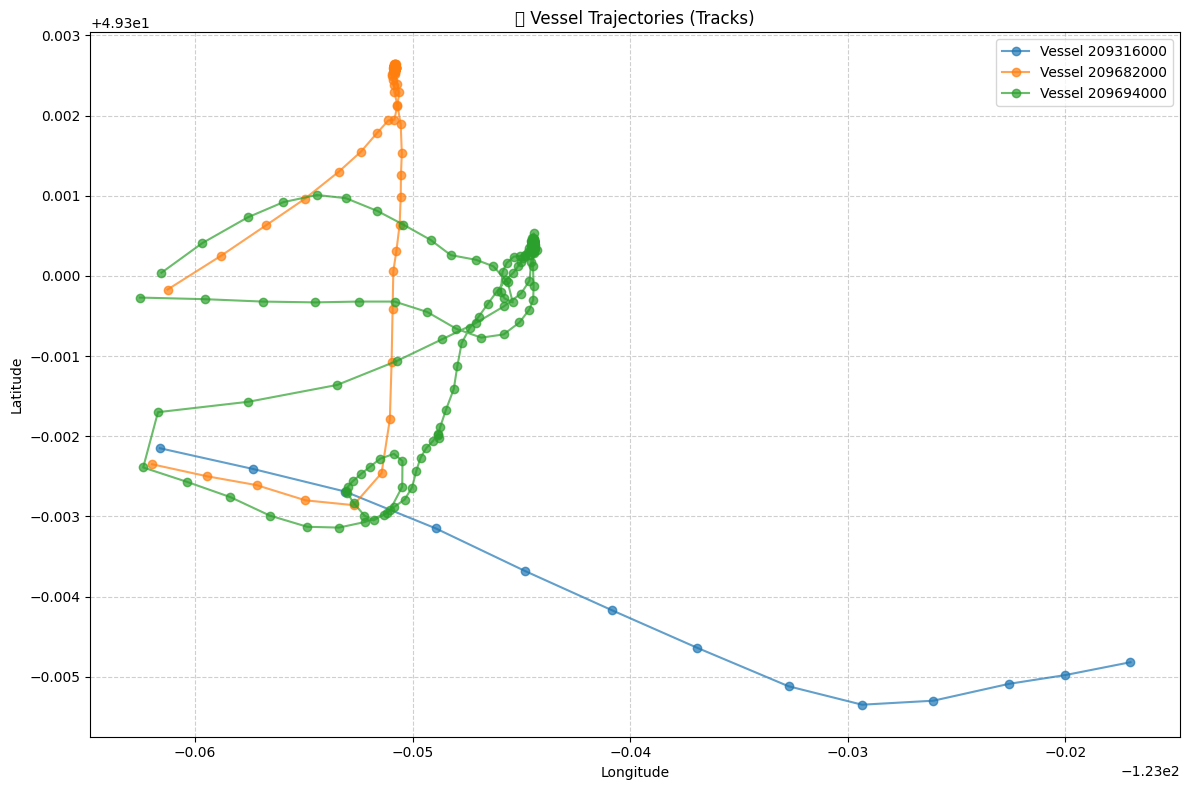

In [7]:
import matplotlib.pyplot as plt

# 1️⃣ Select a few vessels for visualization
unique_vessels = vessel_tracks['MMSI'].unique()
selected_vessels = unique_vessels[7:10]  # Select the first 3 vessels for demonstration

# 2️⃣ Plot vessel tracks
plt.figure(figsize=(12, 8))

for vessel in selected_vessels:
    # Extract data for each selected vessel
    vessel_data = vessel_tracks[vessel_tracks['MMSI'] == vessel].sort_values('BaseDateTime')
    
    # Plot the vessel's movement
    plt.plot(vessel_data['LON'], vessel_data['LAT'], 
             marker='o', linestyle='-', label=f'Vessel {vessel}', alpha=0.7)

# 3️⃣ Plot Styling
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('🚢 Vessel Trajectories (Tracks)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 4️⃣ Show the plot
plt.show()


In [8]:
!pip install folium


   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   ---------------------------------------- 110.5/110.5 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
   ---------------------------------------- 85.1/85.1 kB 5.0 MB/s eta 0:00:00


In [9]:
import folium

# 1️⃣ Create a base map centered on the general area of the data
# Assuming vessels are near Vancouver based on LAT/LON ranges in the data
base_map = folium.Map(location=[49.3, -123.1], zoom_start=10, tiles='CartoDB positron')

# 2️⃣ Select a few vessels to plot their tracks
unique_vessels = vessel_tracks['MMSI'].unique()
selected_vessels = unique_vessels[7:10]  # Plot first 3 vessels for demonstration

# 3️⃣ Plot vessel tracks on the map
for vessel in selected_vessels:
    # Extract vessel data
    vessel_data = vessel_tracks[vessel_tracks['MMSI'] == vessel].sort_values('BaseDateTime')
    
    # Extract coordinates as list of [lat, lon] pairs
    coordinates = vessel_data[['LAT', 'LON']].values.tolist()
    
    # Add a polyline for each vessel's track
    folium.PolyLine(
        coordinates,
        color='blue',
        weight=2,
        opacity=0.7,
        popup=f'Vessel {vessel}'
    ).add_to(base_map)

# 4️⃣ Display the map
base_map


In [10]:
import folium
import random

# 1️⃣ Initialize the base map centered on the data region
base_map = folium.Map(location=[49.3, -123.1], zoom_start=10, tiles='CartoDB positron')

# 2️⃣ Select a few vessels for visualization
unique_vessels = vessel_tracks['MMSI'].unique()
selected_vessels = unique_vessels[:5]  # Plot tracks for 5 vessels

# 3️⃣ Generate random colors for each vessel
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# 4️⃣ Plot vessel tracks with unique colors
for vessel in selected_vessels:
    # Extract vessel data and sort by time
    vessel_data = vessel_tracks[vessel_tracks['MMSI'] == vessel].sort_values('BaseDateTime')
    
    # Convert LAT and LON to coordinate pairs
    coordinates = vessel_data[['LAT', 'LON']].values.tolist()
    
    # Assign a random color for each vessel
    vessel_color = random_color()
    
    # Plot the vessel's track on the map
    folium.PolyLine(
        coordinates,
        color=vessel_color,
        weight=3,
        opacity=0.8,
        popup=f'Vessel {vessel}'
    ).add_to(base_map)

# 5️⃣ Display the interactive map
base_map


In [11]:
vessel_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102532 entries, 0 to 2102531
Data columns (total 26 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MMSI                   int64  
 1   BaseDateTime           object 
 2   LAT                    float64
 3   LON                    float64
 4   SOG                    float64
 5   COG                    float64
 6   Heading                float64
 7   VesselName             object 
 8   IMO                    object 
 9   CallSign               object 
 10  VesselType             float64
 11  Status                 float64
 12  Length                 float64
 13  Width                  float64
 14  Draft                  float64
 15  Cargo                  float64
 16  TransceiverClass       object 
 17  has_IMO                bool   
 18  has_CallSign           bool   
 19  VesselGroup            object 
 20  hour                   int64  
 21  day                    int64  
 22  month             

In [13]:
vessel_tracks['BaseDateTime'] = pd.to_datetime(vessel_tracks['BaseDateTime'])

# 1️⃣ Create a copy of the original dataset
vessel_tracks_downsampled = vessel_tracks.copy()

# 2️⃣ Downsample: Aggregate every 10 minutes to reduce data density
# This keeps the general movement patterns intact but reduces data redundancy.

vessel_tracks_downsampled = vessel_tracks_downsampled.groupby(
    ['MMSI', pd.Grouper(key='BaseDateTime', freq='10min')]
).agg({
    'LAT': 'mean',
    'LON': 'mean',
    'SOG': 'mean',
    'COG': 'mean',
    'Heading': 'mean'
}).reset_index()

print(f"📉 Downsampled dataset size: {len(vessel_tracks_downsampled)} entries")


📉 Downsampled dataset size: 559359 entries


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1️⃣ Select relevant features for clustering
features_for_dbscan = vessel_tracks_downsampled[['LAT', 'LON', 'SOG', 'COG']]

# 2️⃣ Scale the features for better clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_dbscan)

# 3️⃣ Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=0.861, min_samples=10)
vessel_tracks_downsampled['Cluster'] = dbscan.fit_predict(scaled_features)

# 4️⃣ Count detected anomalies (-1 indicates anomalies)
anomalies_detected = vessel_tracks_downsampled[vessel_tracks_downsampled['Cluster'] == -1]
print(f"🚨 Number of anomalies detected by DBSCAN: {len(anomalies_detected)}")


MemoryError: 

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Initialize DBSCAN parameters
dbscan = DBSCAN(eps=0.861, min_samples=10)

# Store results
anomaly_results = []

# Apply DBSCAN on each vessel's track
for vessel in vessel_tracks_downsampled['MMSI'].unique():
    vessel_data = vessel_tracks_downsampled[vessel_tracks_downsampled['MMSI'] == vessel]
    
    # Select relevant features
    features = vessel_data[['LAT', 'LON', 'SOG', 'COG']]
    
    # Scale the data
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Apply DBSCAN
    clusters = dbscan.fit_predict(scaled_features)
    
    # Add results to the vessel data
    vessel_data['Cluster'] = clusters
    
    # Collect anomalies (-1 = anomaly)
    anomalies = vessel_data[vessel_data['Cluster'] == -1]
    anomaly_results.append(anomalies)

# Combine all detected anomalies
all_anomalies = pd.concat(anomaly_results)
print(f"🚨 Total anomalies detected across vessels: {len(all_anomalies)}")


C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\2677270236.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessel_data['Cluster'] = clusters
C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\2677270236.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessel_data['Cluster'] = clusters
C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\2677270236.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


🚨 Total anomalies detected across vessels: 12489


In [16]:
import matplotlib.pyplot as plt

# Plot vessel tracks and highlight anomalies
plt.figure(figsize=(12, 8))

# Plot normal vessel behavior
plt.scatter(vessel_tracks_downsampled[vessel_tracks_downsampled['Cluster'] != -1]['LON'],
            vessel_tracks_downsampled[vessel_tracks_downsampled['Cluster'] != -1]['LAT'],
            color='blue', s=10, alpha=0.5, label='Normal Behavior')

# Plot detected anomalies
plt.scatter(all_anomalies['LON'], all_anomalies['LAT'],
            color='red', s=20, edgecolor='black', label='Anomalies')

# Plot Styling
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('🚢 Vessel Tracks with DBSCAN-Detected Anomalies')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


KeyError: 'Cluster'

<Figure size 1200x800 with 0 Axes>

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.861, min_samples=10)

# Create an empty DataFrame to store all vessel results
clustered_results = []

# Apply DBSCAN on each vessel's track
for vessel in vessel_tracks_downsampled['MMSI'].unique():
    vessel_data = vessel_tracks_downsampled[vessel_tracks_downsampled['MMSI'] == vessel].copy()
    
    # Select relevant features
    features = vessel_data[['LAT', 'LON', 'SOG', 'COG']]
    
    # Scale the data
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Apply DBSCAN
    clusters = dbscan.fit_predict(scaled_features)
    
    # ✅ Correctly store cluster labels
    vessel_data['Cluster'] = clusters
    
    # Append vessel data with cluster labels
    clustered_results.append(vessel_data)

# Combine all vessel data back into a single DataFrame
vessel_tracks_downsampled = pd.concat(clustered_results)

# ✅ Collect all anomalies (-1 = anomaly)
all_anomalies = vessel_tracks_downsampled[vessel_tracks_downsampled['Cluster'] == -1]

print(f"🚨 Total anomalies detected across vessels: {len(all_anomalies)}")


🚨 Total anomalies detected across vessels: 12489


C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\564924450.py:19: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


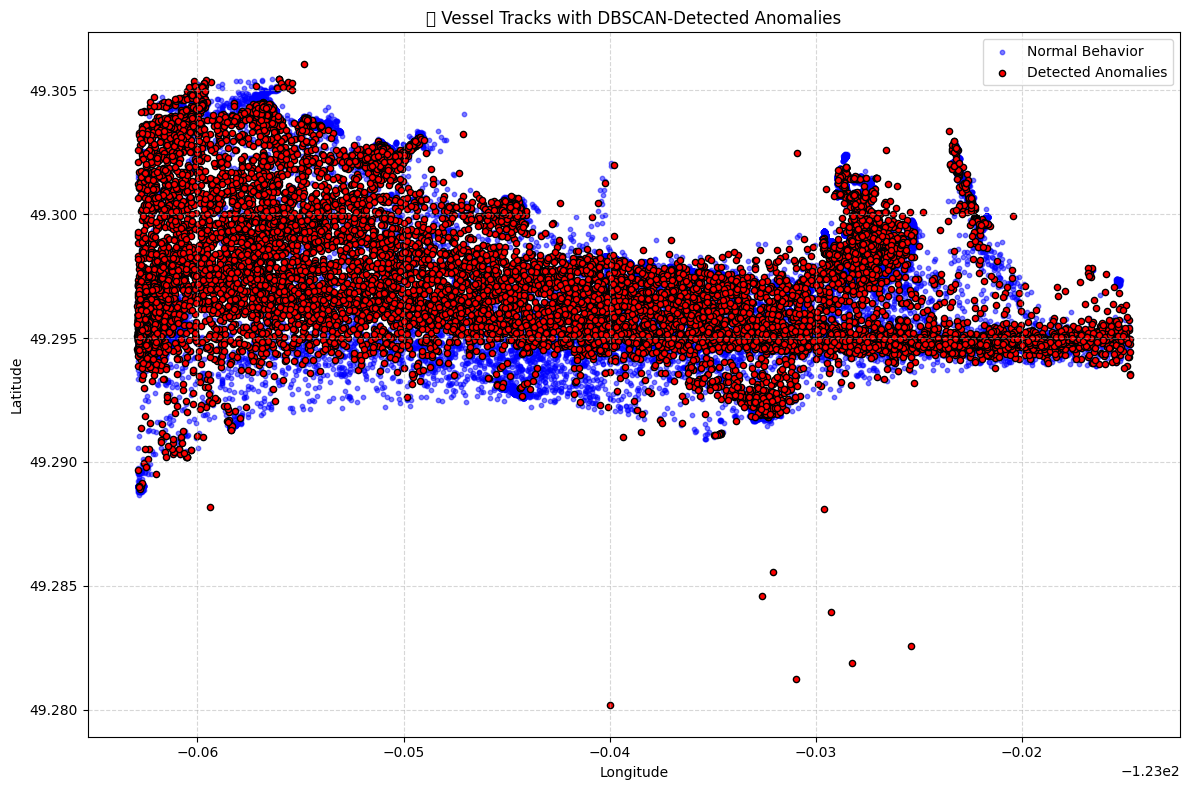

In [18]:
import matplotlib.pyplot as plt

# Plot normal behavior
plt.figure(figsize=(12, 8))
plt.scatter(vessel_tracks_downsampled[vessel_tracks_downsampled['Cluster'] != -1]['LON'],
            vessel_tracks_downsampled[vessel_tracks_downsampled['Cluster'] != -1]['LAT'],
            color='blue', s=10, alpha=0.5, label='Normal Behavior')

# Plot anomalies
plt.scatter(all_anomalies['LON'], all_anomalies['LAT'],
            color='red', s=20, edgecolor='black', label='Detected Anomalies')

# Plot Styling
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('🚢 Vessel Tracks with DBSCAN-Detected Anomalies')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\2716475318.py:22: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


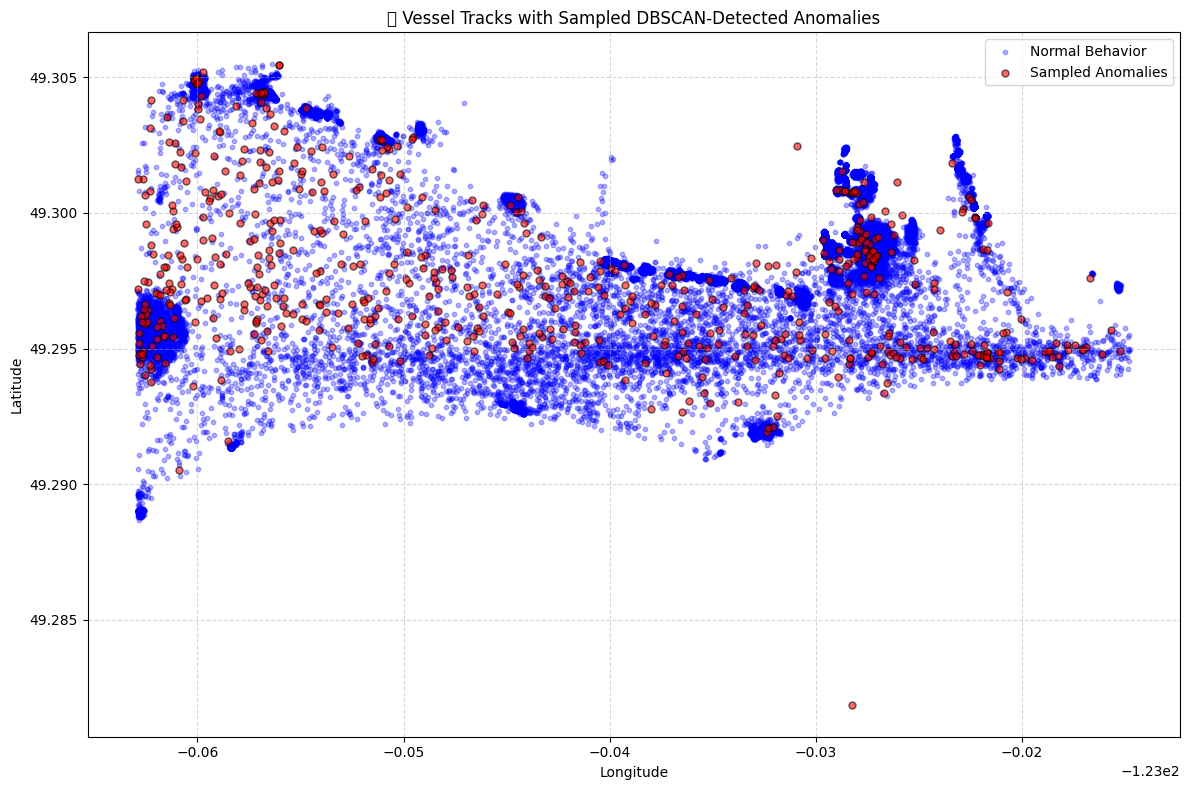

In [19]:
import matplotlib.pyplot as plt

# Sample 5% of anomalies for clearer visualization
sampled_anomalies = all_anomalies.sample(frac=0.05, random_state=42)

plt.figure(figsize=(12, 8))

# Plot normal behavior
plt.scatter(vessel_tracks_downsampled[vessel_tracks_downsampled['Cluster'] != -1]['LON'],
            vessel_tracks_downsampled[vessel_tracks_downsampled['Cluster'] != -1]['LAT'],
            color='blue', s=10, alpha=0.3, label='Normal Behavior')

# Plot sampled anomalies
plt.scatter(sampled_anomalies['LON'], sampled_anomalies['LAT'],
            color='red', s=25, edgecolor='black', alpha=0.6, label='Sampled Anomalies')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('🌊 Vessel Tracks with Sampled DBSCAN-Detected Anomalies')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [21]:
# Count the number of unique MMSI (vessels) in the dataset
distinct_mmsi_count = vessel_tracks_downsampled['MMSI'].nunique()
print(f"🚢 Total distinct vessels (MMSI): {distinct_mmsi_count}")


🚢 Total distinct vessels (MMSI): 1162


🚢 Selected Vessel MMSI: 353862000


C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\449744551.py:29: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


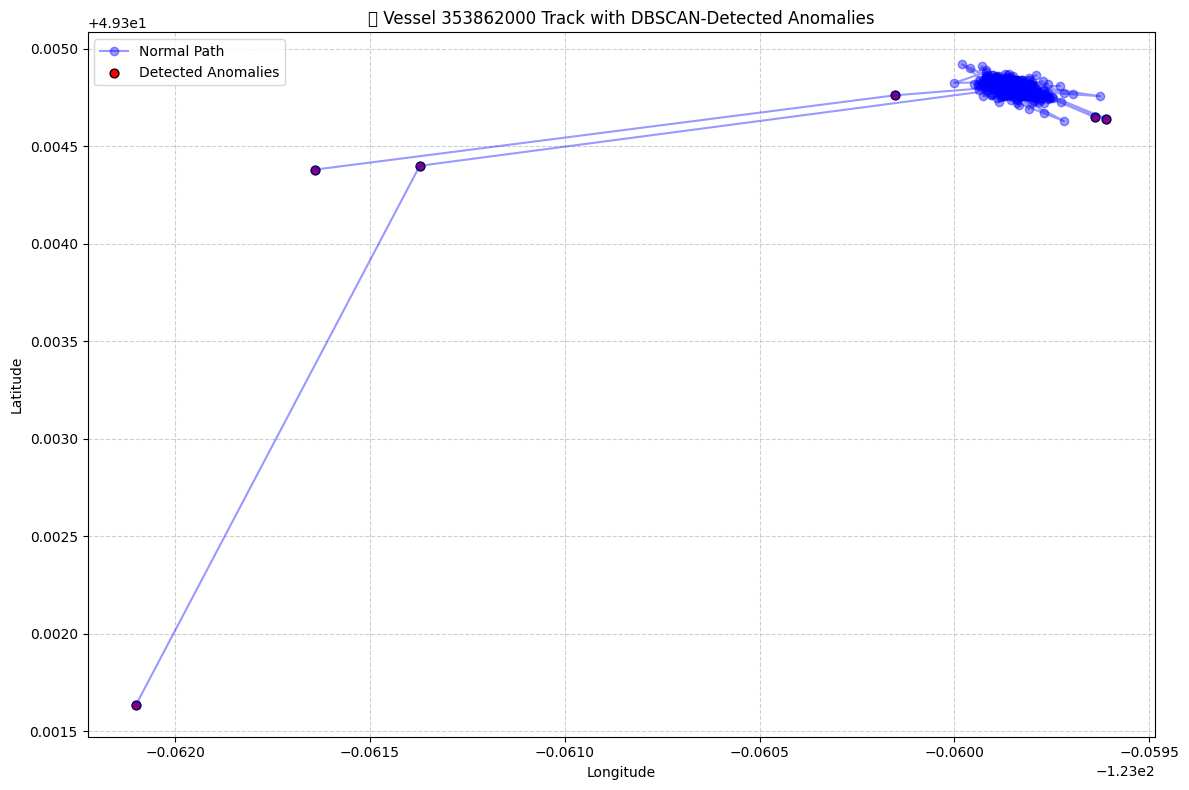

In [26]:
import matplotlib.pyplot as plt
import random

# 1️⃣ Randomly select a vessel (MMSI)
random_mmsi = random.choice(vessel_tracks_downsampled['MMSI'].unique())
print(f"🚢 Selected Vessel MMSI: {random_mmsi}")

# 2️⃣ Filter data for the selected vessel
vessel_data = vessel_tracks_downsampled[vessel_tracks_downsampled['MMSI'] == random_mmsi]
vessel_anomalies = vessel_data[vessel_data['Cluster'] == -1]

# 3️⃣ Plot the vessel's trajectory and detected anomalies
plt.figure(figsize=(12, 8))

# Plot the vessel's normal movement
plt.plot(vessel_data['LON'], vessel_data['LAT'],
         color='blue', marker='o', linestyle='-', alpha=0.4, label='Normal Path')

# Highlight detected anomalies
plt.scatter(vessel_anomalies['LON'], vessel_anomalies['LAT'],
            color='red', s=40, edgecolor='black', label='Detected Anomalies')

# Plot styling
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'🚢 Vessel {random_mmsi} Track with DBSCAN-Detected Anomalies')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\3676606932.py:33: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


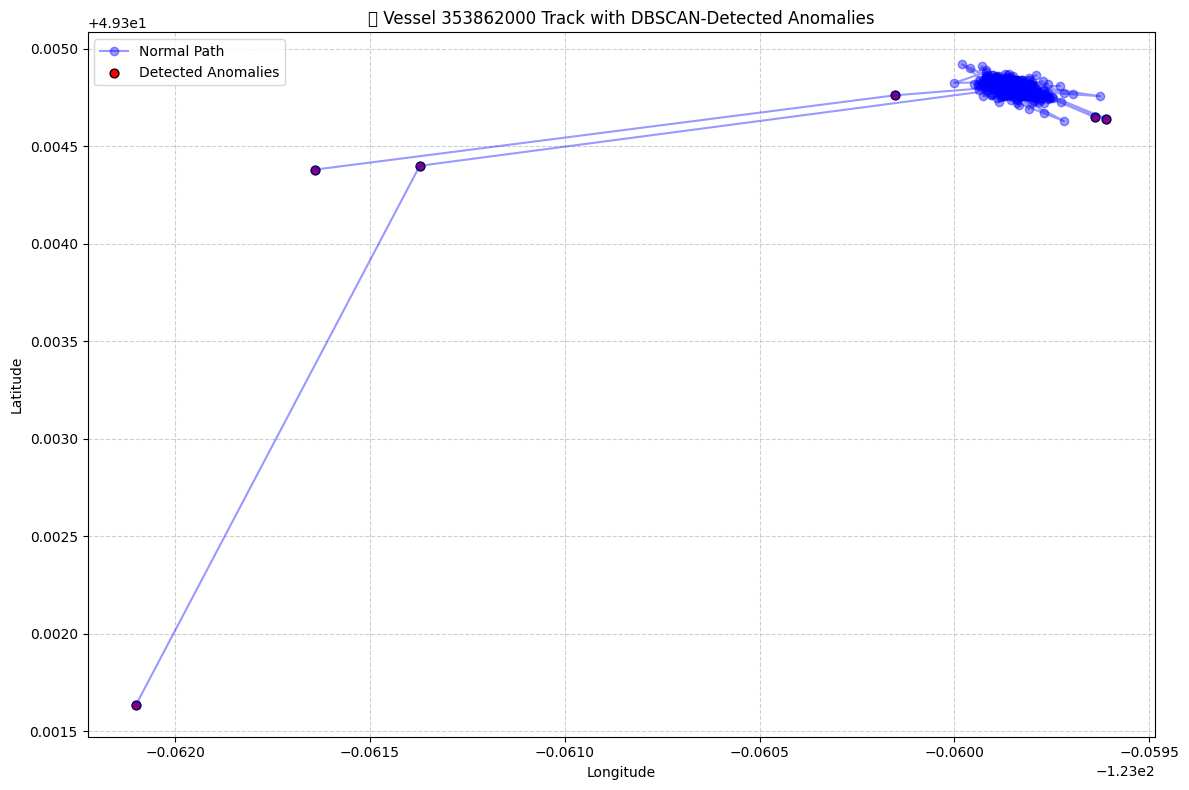

In [27]:
import matplotlib.pyplot as plt

# 1️⃣ Input MMSI from the user
input_mmsi = 353862000

# 2️⃣ Filter data for the input MMSI
vessel_data = vessel_tracks_downsampled[vessel_tracks_downsampled['MMSI'] == input_mmsi]

# Check if the entered MMSI exists in the data
if vessel_data.empty:
    print(f"⚠️ No data found for MMSI {input_mmsi}. Please enter a valid MMSI.")
else:
    # Filter detected anomalies for the selected vessel
    vessel_anomalies = vessel_data[vessel_data['Cluster'] == -1]

    # 3️⃣ Plot the vessel's trajectory and detected anomalies
    plt.figure(figsize=(12, 8))

    # Plot the vessel's normal movement
    plt.plot(vessel_data['LON'], vessel_data['LAT'],
             color='blue', marker='o', linestyle='-', alpha=0.4, label='Normal Path')

    # Highlight detected anomalies
    plt.scatter(vessel_anomalies['LON'], vessel_anomalies['LAT'],
                color='red', s=40, edgecolor='black', label='Detected Anomalies')

    # Plot styling
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'🚢 Vessel {input_mmsi} Track with DBSCAN-Detected Anomalies')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    plt.show()


In [28]:
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,TransceiverClass,has_IMO,has_CallSign,VesselGroup,hour,day,month,day_of_week,week,transmission_interval
0,0,2023-04-02 19:08:58,49.29758,-123.03559,0.0,275.9,511.0,UNKNOWN,NaN,NaN,...,A,False,False,Not Available,19,2,4,6,13,NaN
1,9108431,2022-08-09 22:35:16,49.29482,-123.06083,6.9,81.4,81.0,UNKNOWN,NaN,NaN,...,B,False,False,Other,22,9,8,1,32,NaN
2,9108431,2022-08-09 22:37:57,49.29553,-123.05262,7.3,85.0,85.0,UNKNOWN,NaN,NaN,...,B,False,False,Other,22,9,8,1,32,161.0
3,9108431,2022-08-09 22:39:16,49.29597,-123.04853,7.6,92.5,92.0,UNKNOWN,NaN,NaN,...,B,False,False,Other,22,9,8,1,32,79.0
4,9108431,2022-08-09 22:41:35,49.29557,-123.04118,7.7,95.2,95.0,UNKNOWN,NaN,NaN,...,B,False,False,Other,22,9,8,1,32,139.0


In [29]:
# Print distinct VesselGroup values
distinct_vessel_groups = df['VesselGroup'].unique()

print("🚢 Distinct Vessel Groups in the dataset:")
for group in distinct_vessel_groups:
    print(f"- {group}")


🚢 Distinct Vessel Groups in the dataset:
- Not Available
- Other
- Cargo
- Tanker
- Passenger
- Pleasure Craft/Sailing
- Fishing
- Military


In [30]:
# Count unique MMSIs for each VesselGroup
unique_mmsi_per_group = df.groupby('VesselGroup')['MMSI'].nunique()

# Print results
print("🚢 Number of Unique MMSIs in Each Vessel Group:\n")
for group, count in unique_mmsi_per_group.items():
    print(f"- {group}: {count} vessels")


🚢 Number of Unique MMSIs in Each Vessel Group:

- Cargo: 573 vessels
- Fishing: 17 vessels
- Military: 1 vessels
- Not Available: 6 vessels
- Other: 117 vessels
- Passenger: 31 vessels
- Pleasure Craft/Sailing: 339 vessels
- Tanker: 87 vessels


In [32]:
vessel_tracks_downsampled.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,Cluster
0,0,2023-04-02 19:00:00,49.297580,-123.035590,0.000000,275.90,511.0,-1
1,9108431,2022-08-09 22:30:00,49.295440,-123.053993,7.266667,86.30,86.0,-1
2,9108431,2022-08-09 22:40:00,49.295278,-123.033280,7.920000,92.92,92.4,-1
3,9108431,2022-08-10 00:00:00,49.293990,-123.016600,5.300000,290.90,290.0,-1
4,9108431,2022-08-10 00:10:00,49.294076,-123.028952,5.140000,264.72,264.4,-1


In [33]:
# 1️⃣ Ensure 'BaseDateTime' is in datetime format
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])

# 2️⃣ Create a copy of the original dataset
vessel_tracks_downsampled1 = df.copy()

# 3️⃣ Downsample: Aggregate every 10 minutes and preserve VesselGroup
vessel_tracks_downsampled1 = vessel_tracks_downsampled1.groupby(
    ['MMSI', 'VesselGroup', pd.Grouper(key='BaseDateTime', freq='10min')]
).agg({
    'LAT': 'mean',
    'LON': 'mean',
    'SOG': 'mean',
    'COG': 'mean',
    'Heading': 'mean'
}).reset_index()

print(f"📉 Downsampled dataset size (with VesselGroup): {len(vessel_tracks_downsampled1)} entries")


📉 Downsampled dataset size (with VesselGroup): 559359 entries


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.861, min_samples=10)

# Define the vessel groups to analyze
target_vessel_groups = ['Cargo', 'Fishing', 'Tanker', 'Pleasure Craft/Sailing']

# Dictionaries to store results
anomalies_by_group = {}
total_entries_by_group = {}

# Loop through each VesselGroup
for group in target_vessel_groups:
    print(f"🔍 Processing Vessel Group: {group}")
    
    # Filter data for the current VesselGroup
    group_data = vessel_tracks_downsampled1[vessel_tracks_downsampled1['VesselGroup'] == group]
    
    # Store total data points for the group
    total_entries_by_group[group] = len(group_data)
    
    clustered_results = []
    
    # Apply DBSCAN on each vessel within the group
    for vessel in group_data['MMSI'].unique():
        vessel_data = group_data[group_data['MMSI'] == vessel].copy()
        
        # Select relevant features
        features = vessel_data[['LAT', 'LON', 'SOG', 'COG']]
        
        # Scale the data
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features)
        
        # Apply DBSCAN
        clusters = dbscan.fit_predict(scaled_features)
        
        # Store cluster labels
        vessel_data['Cluster'] = clusters
        
        # Collect vessel data with cluster labels
        clustered_results.append(vessel_data)
    
    # Combine results for the current group
    group_clustered_data = pd.concat(clustered_results)
    
    # Collect anomalies (-1 indicates anomaly)
    group_anomalies = group_clustered_data[group_clustered_data['Cluster'] == -1]
    
    # Store anomalies for the current group
    anomalies_by_group[group] = group_anomalies
    
    # Print summary for the group
    anomaly_count = len(group_anomalies)
    total_count = total_entries_by_group[group]
    anomaly_percentage = (anomaly_count / total_count) * 100
    
    print(f"📊 Total data points in {group}: {total_count}")
    print(f"🚨 Anomalies detected in {group}: {anomaly_count}")
    print(f"📈 Anomaly Percentage in {group}: {anomaly_percentage:.2f}%\n")

# ✅ Combine all anomalies across selected vessel groups
all_group_anomalies = pd.concat(anomalies_by_group.values())

print(f"🚨 Total anomalies detected across all selected vessel groups: {len(all_group_anomalies)}")


🔍 Processing Vessel Group: Cargo
📊 Total data points in Cargo: 252845
🚨 Anomalies detected in Cargo: 5047
📈 Anomaly Percentage in Cargo: 2.00%

🔍 Processing Vessel Group: Fishing
📊 Total data points in Fishing: 99701
🚨 Anomalies detected in Fishing: 323
📈 Anomaly Percentage in Fishing: 0.32%

🔍 Processing Vessel Group: Tanker
📊 Total data points in Tanker: 9395
🚨 Anomalies detected in Tanker: 872
📈 Anomaly Percentage in Tanker: 9.28%

🔍 Processing Vessel Group: Pleasure Craft/Sailing
📊 Total data points in Pleasure Craft/Sailing: 95367
🚨 Anomalies detected in Pleasure Craft/Sailing: 3942
📈 Anomaly Percentage in Pleasure Craft/Sailing: 4.13%

🚨 Total anomalies detected across all selected vessel groups: 10184


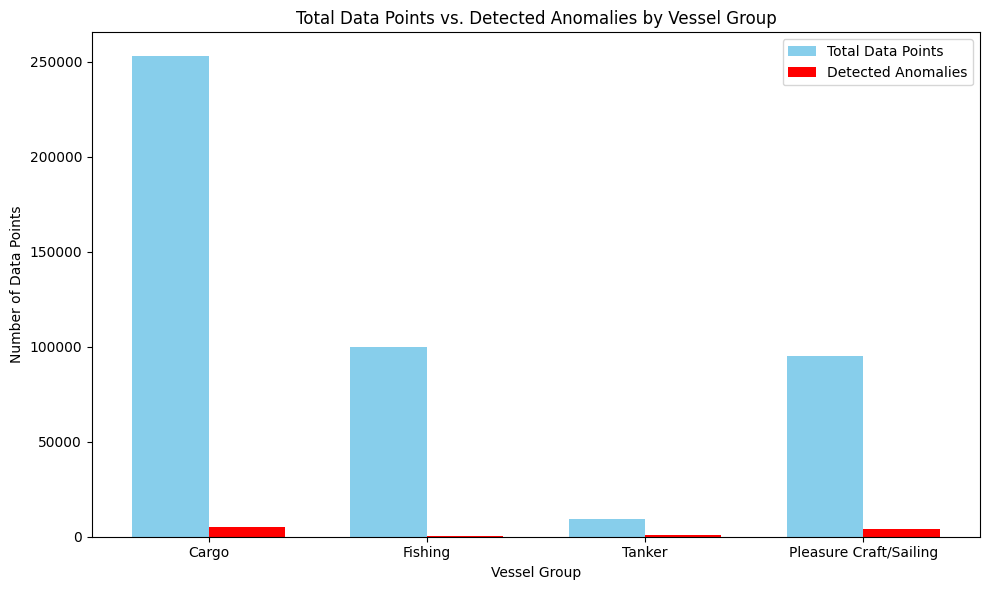

In [35]:
import matplotlib.pyplot as plt

# Data for plotting
vessel_groups = ['Cargo', 'Fishing', 'Tanker', 'Pleasure Craft/Sailing']
total_points = [252845, 99701, 9395, 95367]
anomalies = [5047, 323, 872, 3942]

# Bar width
bar_width = 0.35
x = range(len(vessel_groups))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, total_points, width=bar_width, label='Total Data Points', color='skyblue')
plt.bar([i + bar_width for i in x], anomalies, width=bar_width, label='Detected Anomalies', color='red')

# Labels and Title
plt.xlabel('Vessel Group')
plt.ylabel('Number of Data Points')
plt.title('Total Data Points vs. Detected Anomalies by Vessel Group')
plt.xticks([i + bar_width / 2 for i in x], vessel_groups)
plt.legend()
plt.tight_layout()

plt.show()


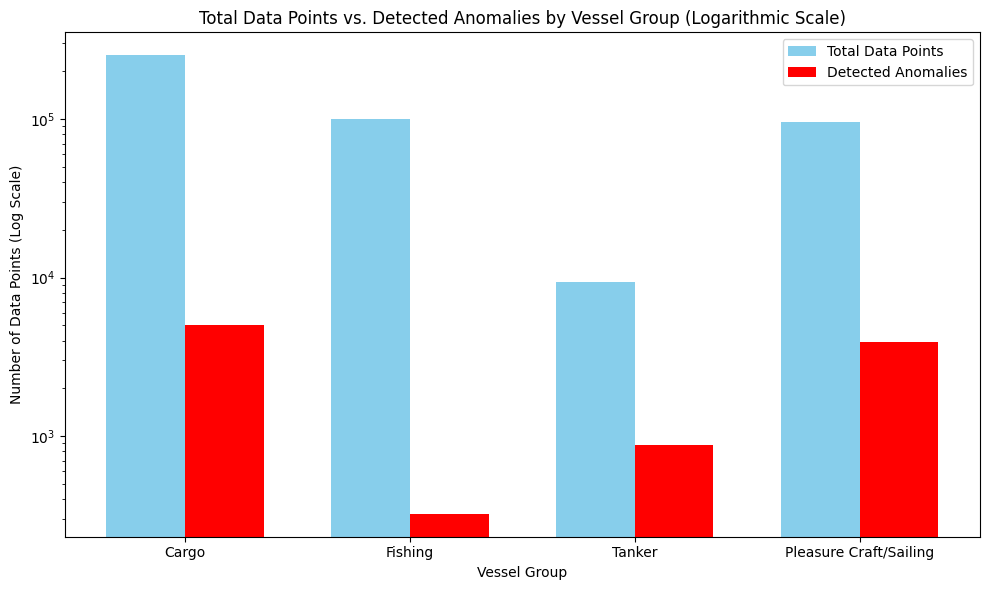

In [36]:
import matplotlib.pyplot as plt

# Vessel groups used in DBSCAN
vessel_groups = target_vessel_groups

# Dynamically calculate total data points and anomalies for each VesselGroup
total_points = [total_entries_by_group[group] for group in vessel_groups]
anomalies = [len(anomalies_by_group[group]) for group in vessel_groups]

# Plotting with logarithmic scale
bar_width = 0.35
x = range(len(vessel_groups))

plt.figure(figsize=(10, 6))

# Plot total data points (blue)
plt.bar(x, total_points, width=bar_width, label='Total Data Points', color='skyblue')

# Plot detected anomalies (red)
plt.bar([i + bar_width for i in x], anomalies, width=bar_width, label='Detected Anomalies', color='red')

# Apply logarithmic scale to the Y-axis
plt.yscale('log')

# Labels and Title
plt.xlabel('Vessel Group')
plt.ylabel('Number of Data Points (Log Scale)')
plt.title('Total Data Points vs. Detected Anomalies by Vessel Group (Logarithmic Scale)')
plt.xticks([i + bar_width / 2 for i in x], vessel_groups)
plt.legend()
plt.tight_layout()

plt.show()


C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\2660306093.py:24: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


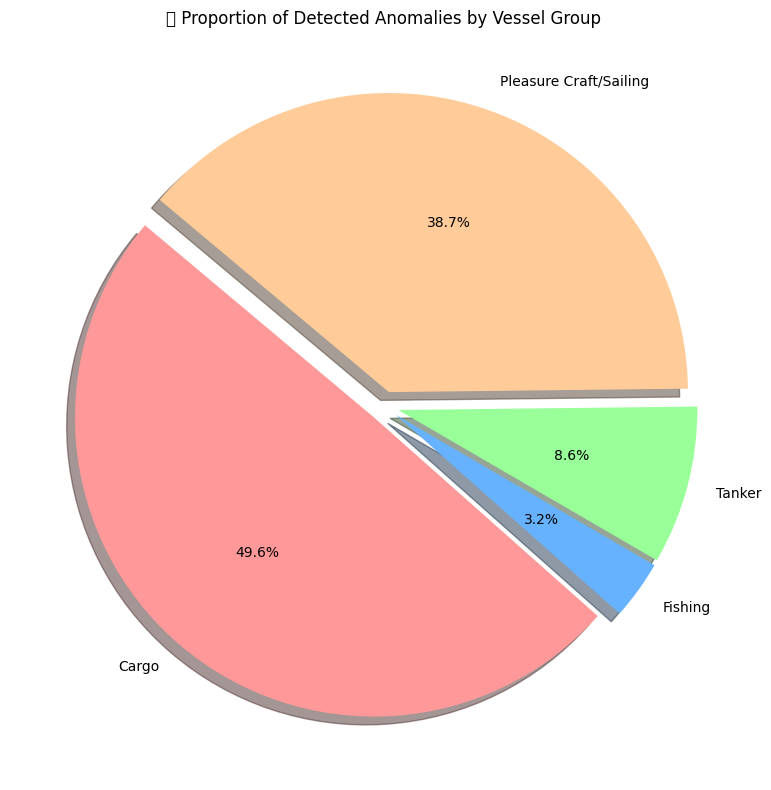

In [37]:
import matplotlib.pyplot as plt

# 1️⃣ Vessel groups used in DBSCAN
vessel_groups = target_vessel_groups

# 2️⃣ Dynamically calculate the number of anomalies for each group
anomalies = [len(anomalies_by_group[group]) for group in vessel_groups]

# 3️⃣ Define color scheme for clarity
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # Distinct colors for each group

# 4️⃣ Plot the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(anomalies, 
        labels=vessel_groups, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        explode=[0.05] * len(vessel_groups),  # Slightly offset each slice for visibility
        shadow=True)

# 5️⃣ Add title
plt.title('🚨 Proportion of Detected Anomalies by Vessel Group')
plt.tight_layout()

# 6️⃣ Show the plot
plt.show()


In [39]:
import matplotlib.pyplot as plt

# 1️⃣ Plot vessel tracks and detected anomalies
plt.figure(figsize=(12, 8))

# Plot normal vessel behavior
plt.scatter(vessel_tracks_downsampled1[vessel_tracks_downsampled1['Cluster'] != -1]['LON'],
            vessel_tracks_downsampled1[vessel_tracks_downsampled1['Cluster'] != -1]['LAT'],
            color='blue', s=10, alpha=0.3, label='Normal Behavior')

# Plot detected anomalies
plt.scatter(all_group_anomalies['LON'], all_group_anomalies['LAT'],
            color='red', s=20, edgecolor='black', alpha=0.6, label='Detected Anomalies')

# 2️⃣ Plot Styling
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('🚢 Vessel Tracks with DBSCAN-Detected Anomalies')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# 3️⃣ Show the plot
plt.show()


KeyError: 'Cluster'

<Figure size 1200x800 with 0 Axes>

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.861, min_samples=10)

# Define the vessel groups to analyze
target_vessel_groups = ['Cargo', 'Fishing', 'Tanker', 'Pleasure Craft/Sailing']

# Dictionaries to store results
anomalies_by_group = {}
total_entries_by_group = {}
clustered_results_all_groups = []

# Loop through each VesselGroup
for group in target_vessel_groups:
    print(f"🔍 Processing Vessel Group: {group}")
    
    # Filter data for the current VesselGroup
    group_data = vessel_tracks_downsampled1[vessel_tracks_downsampled1['VesselGroup'] == group]
    
    # Store total data points for the group
    total_entries_by_group[group] = len(group_data)
    
    clustered_results = []
    
    # Apply DBSCAN on each vessel within the group
    for vessel in group_data['MMSI'].unique():
        vessel_data = group_data[group_data['MMSI'] == vessel].copy()
        
        # Select relevant features
        features = vessel_data[['LAT', 'LON', 'SOG', 'COG']]
        
        # Scale the data
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features)
        
        # Apply DBSCAN
        clusters = dbscan.fit_predict(scaled_features)
        
        # ✅ Store cluster labels
        vessel_data['Cluster'] = clusters
        
        # Collect vessel data with cluster labels
        clustered_results.append(vessel_data)
    
    # ✅ Combine results for the current group
    group_clustered_data = pd.concat(clustered_results)
    
    # Append to all groups' results
    clustered_results_all_groups.append(group_clustered_data)
    
    # Collect anomalies (-1 indicates anomaly)
    group_anomalies = group_clustered_data[group_clustered_data['Cluster'] == -1]
    
    # Store anomalies for the current group
    anomalies_by_group[group] = group_anomalies
    
    # Print summary for the group
    anomaly_count = len(group_anomalies)
    total_count = total_entries_by_group[group]
    anomaly_percentage = (anomaly_count / total_count) * 100
    
    print(f"📊 Total data points in {group}: {total_count}")
    print(f"🚨 Anomalies detected in {group}: {anomaly_count}")
    print(f"📈 Anomaly Percentage in {group}: {anomaly_percentage:.2f}%\n")

# ✅ Combine all clustered data back into vessel_tracks_downsampled1
vessel_tracks_downsampled1 = pd.concat(clustered_results_all_groups)

# ✅ Combine all anomalies across selected vessel groups
all_group_anomalies = pd.concat(anomalies_by_group.values())

print(f"🚨 Total anomalies detected across all selected vessel groups: {len(all_group_anomalies)}")


🔍 Processing Vessel Group: Cargo
📊 Total data points in Cargo: 252845
🚨 Anomalies detected in Cargo: 5047
📈 Anomaly Percentage in Cargo: 2.00%

🔍 Processing Vessel Group: Fishing
📊 Total data points in Fishing: 99701
🚨 Anomalies detected in Fishing: 323
📈 Anomaly Percentage in Fishing: 0.32%

🔍 Processing Vessel Group: Tanker
📊 Total data points in Tanker: 9395
🚨 Anomalies detected in Tanker: 872
📈 Anomaly Percentage in Tanker: 9.28%

🔍 Processing Vessel Group: Pleasure Craft/Sailing
📊 Total data points in Pleasure Craft/Sailing: 95367
🚨 Anomalies detected in Pleasure Craft/Sailing: 3942
📈 Anomaly Percentage in Pleasure Craft/Sailing: 4.13%

🚨 Total anomalies detected across all selected vessel groups: 10184


C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\2706000580.py:24: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


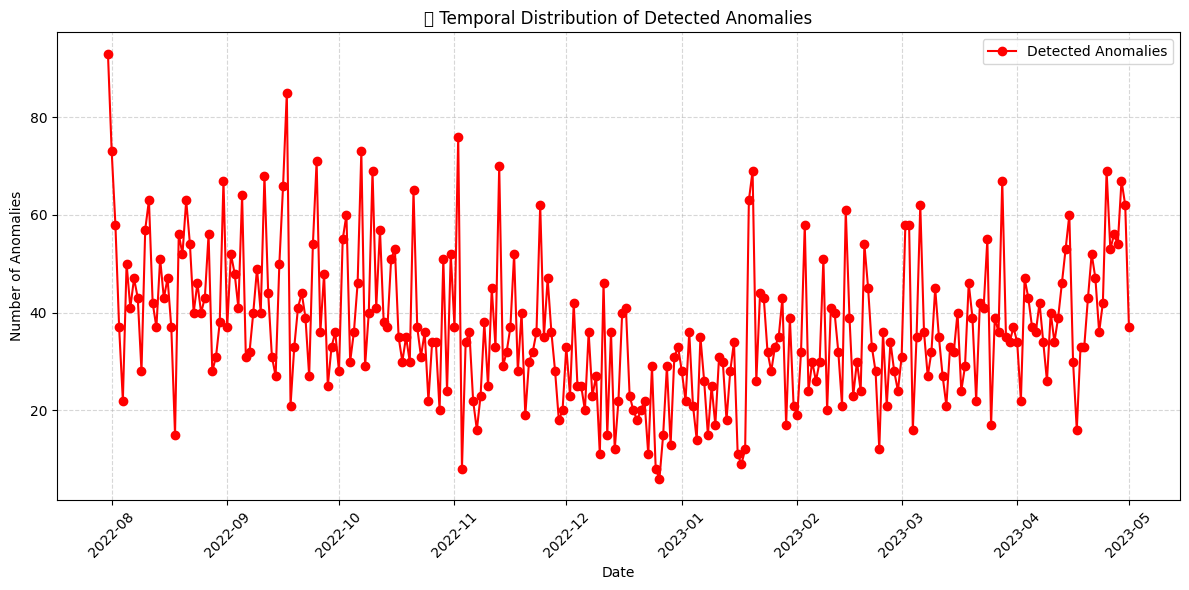

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Ensure 'BaseDateTime' is in datetime format
vessel_tracks_downsampled1['BaseDateTime'] = pd.to_datetime(vessel_tracks_downsampled1['BaseDateTime'])
all_group_anomalies['BaseDateTime'] = pd.to_datetime(all_group_anomalies['BaseDateTime'])

# 2️⃣ Group anomalies by day to observe daily trends
anomalies_over_time = all_group_anomalies.groupby(all_group_anomalies['BaseDateTime'].dt.date).size()

# 3️⃣ Plot the time-series distribution of anomalies
plt.figure(figsize=(12, 6))

plt.plot(anomalies_over_time.index, anomalies_over_time.values, 
         marker='o', linestyle='-', color='red', label='Detected Anomalies')

# 4️⃣ Plot Styling
plt.xlabel('Date')
plt.ylabel('Number of Anomalies')
plt.title('📅 Temporal Distribution of Detected Anomalies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# 5️⃣ Show the plot
plt.show()


C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\707089871.py:34: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


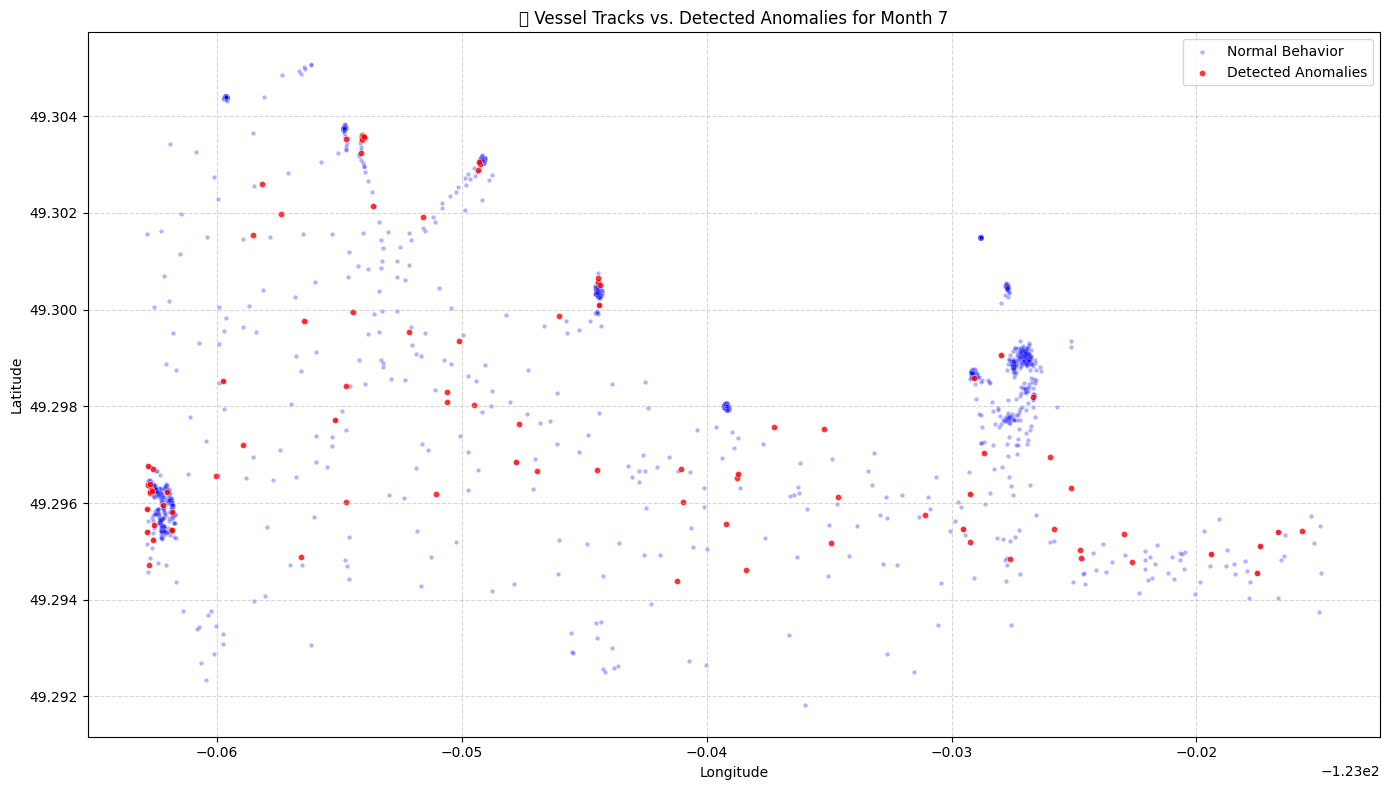

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Select a specific month for analysis (e.g., June = 6)
selected_month = 7  # You can change this to any month (1-12)

# 2️⃣ Ensure 'BaseDateTime' is in datetime format
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])
all_group_anomalies['BaseDateTime'] = pd.to_datetime(all_group_anomalies['BaseDateTime'])

# 3️⃣ Filter normal data from the original dataset for the selected month
normal_month_data = df[df['BaseDateTime'].dt.month == selected_month]

# 4️⃣ Filter detected anomalies for the selected month
anomalies_month_data = all_group_anomalies[all_group_anomalies['BaseDateTime'].dt.month == selected_month]

# 5️⃣ Plot: Normal data vs. Anomalies for the selected month
plt.figure(figsize=(14, 8))

# Plot normal vessel behavior (blue)
sns.scatterplot(data=normal_month_data, x='LON', y='LAT',
                color='blue', alpha=0.3, s=10, label='Normal Behavior')

# Plot detected anomalies (red)
sns.scatterplot(data=anomalies_month_data, x='LON', y='LAT',
                color='red', alpha=0.8, s=20, label='Detected Anomalies')

# 6️⃣ Plot Styling
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'🌊 Vessel Tracks vs. Detected Anomalies for Month {selected_month}')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# 7️⃣ Show the plot
plt.show()


🚢 Selected MMSIs for visualization: [205700000 209191000 215737000 219028012 229143000]


C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\249813453.py:40: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


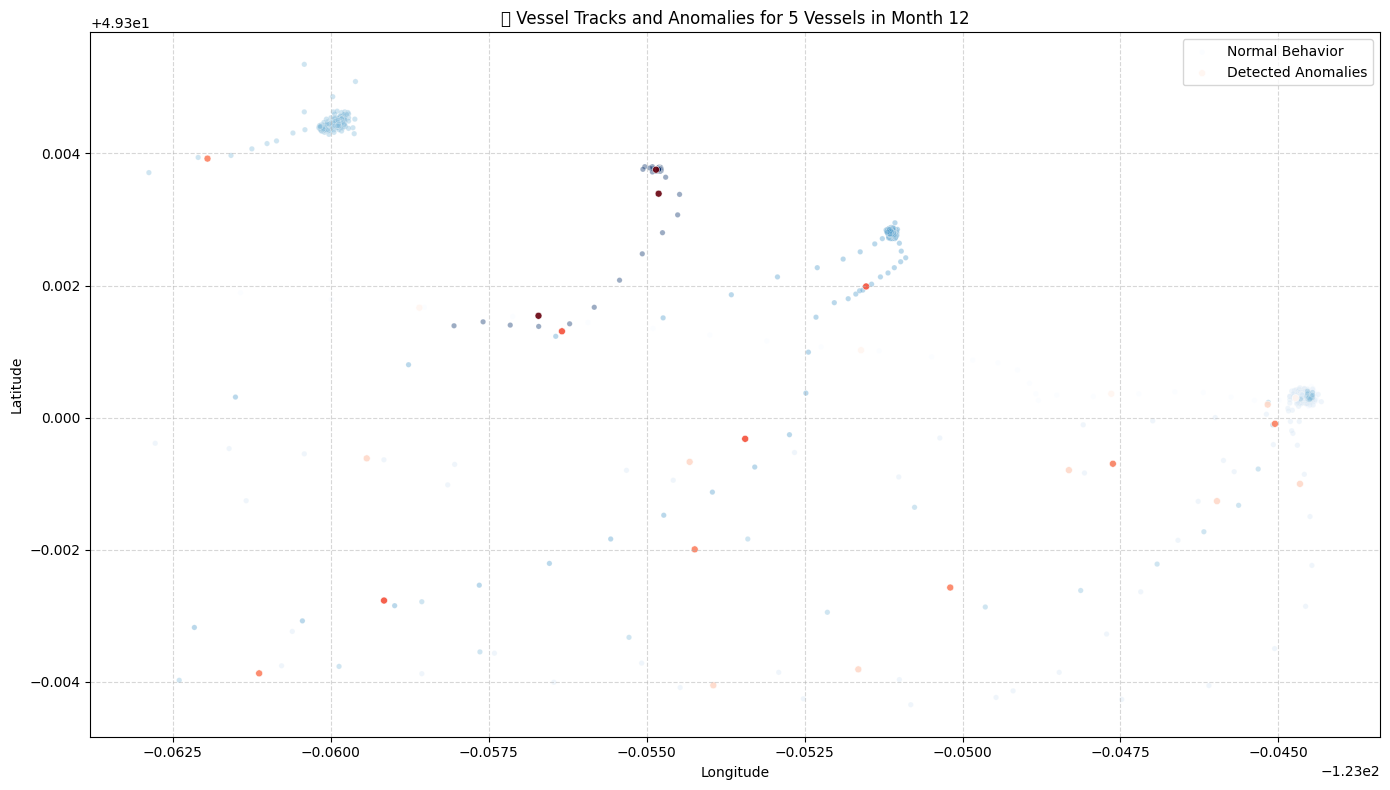

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Select a specific month (e.g., June = 6)
selected_month = 12  # Change this to any month (1-12)

# 2️⃣ Ensure 'BaseDateTime' is in datetime format
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])
all_group_anomalies['BaseDateTime'] = pd.to_datetime(all_group_anomalies['BaseDateTime'])

# 3️⃣ Filter anomalies for the selected month
monthly_anomalies = all_group_anomalies[all_group_anomalies['BaseDateTime'].dt.month == selected_month]

# 4️⃣ Select 5 vessels with detected anomalies
selected_mmsis = monthly_anomalies['MMSI'].unique()[:5]  # Select first 5 unique MMSIs

print(f"🚢 Selected MMSIs for visualization: {selected_mmsis}")

# 5️⃣ Filter the original data for these 5 vessels in the selected month
selected_vessel_tracks = df[(df['MMSI'].isin(selected_mmsis)) & 
                            (df['BaseDateTime'].dt.month == selected_month)]

# 6️⃣ Plot vessel tracks and anomalies
plt.figure(figsize=(14, 8))

# Plot normal vessel tracks (blue)
sns.scatterplot(data=selected_vessel_tracks, x='LON', y='LAT',
                hue='MMSI', palette='Blues', alpha=0.4, s=15, legend=False, label='Normal Behavior')

# Plot detected anomalies (red)
sns.scatterplot(data=monthly_anomalies[monthly_anomalies['MMSI'].isin(selected_mmsis)],
                x='LON', y='LAT', hue='MMSI', palette='Reds', alpha=0.9, s=25, legend=False, label='Detected Anomalies')

# 7️⃣ Plot Styling
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'🌊 Vessel Tracks and Anomalies for 5 Vessels in Month {selected_month}')
plt.legend(['Normal Behavior', 'Detected Anomalies'], loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# 8️⃣ Show the plot
plt.show()


🚢 Selected MMSIs for visualization: [258102000 311353000 356222000 538008749 636015431]


C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\3251590814.py:44: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


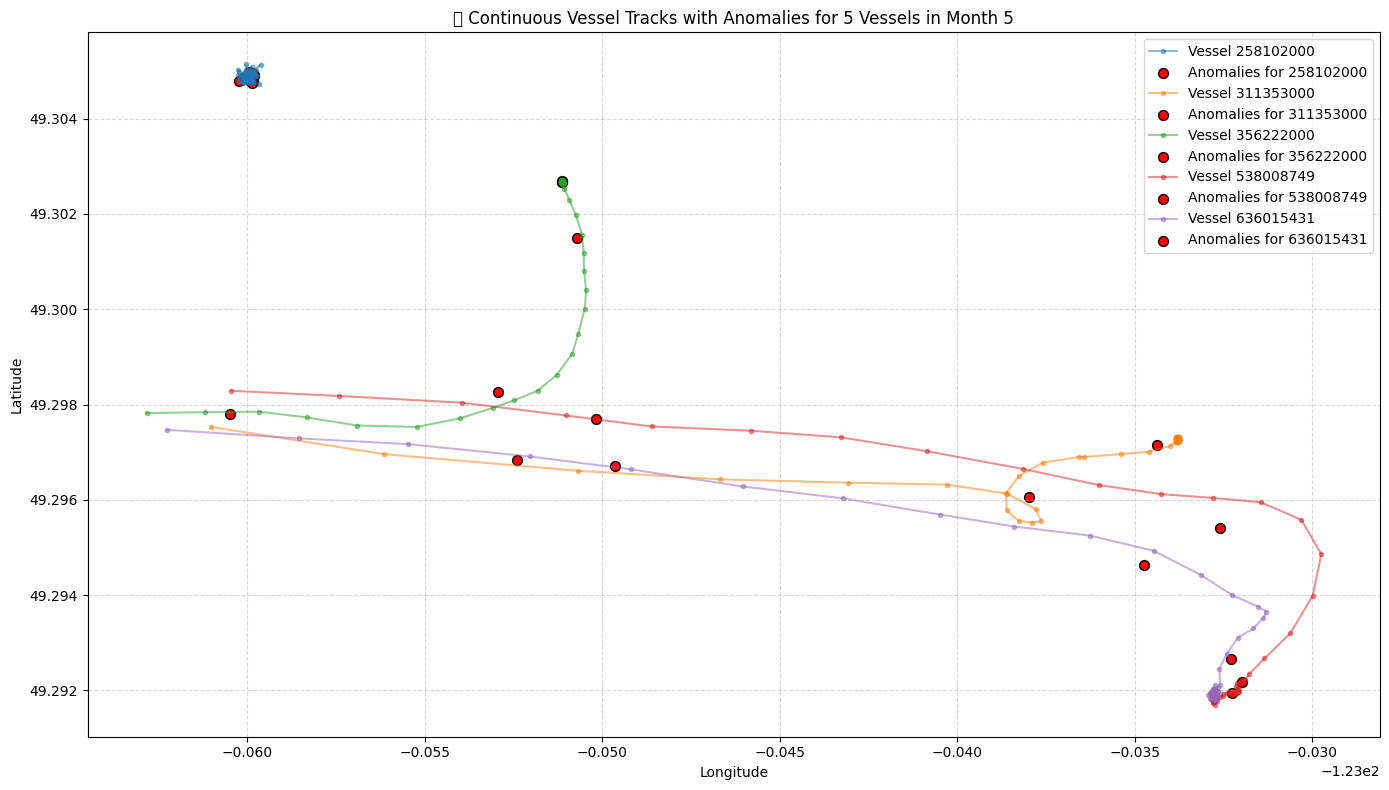

In [64]:
import matplotlib.pyplot as plt

# 1️⃣ Select a specific month for analysis (e.g., June = 6)
selected_month = 5  # Change this value for a different month

# 2️⃣ Ensure 'BaseDateTime' is in datetime format
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])
all_group_anomalies['BaseDateTime'] = pd.to_datetime(all_group_anomalies['BaseDateTime'])

# 3️⃣ Filter anomalies for the selected month
monthly_anomalies = all_group_anomalies[all_group_anomalies['BaseDateTime'].dt.month == selected_month]

# 4️⃣ Select 5 vessels with detected anomalies
selected_mmsis = monthly_anomalies['MMSI'].unique()[:5]  # Select first 5 MMSIs

print(f"🚢 Selected MMSIs for visualization: {selected_mmsis}")

# 5️⃣ Filter original data for the selected vessels and month
selected_vessel_tracks = df[(df['MMSI'].isin(selected_mmsis)) & 
                            (df['BaseDateTime'].dt.month == selected_month)]

# 6️⃣ Plot continuous vessel tracks with anomalies highlighted
plt.figure(figsize=(14, 8))

for mmsi in selected_mmsis:
    # Extract vessel track and sort by time
    vessel_data = selected_vessel_tracks[selected_vessel_tracks['MMSI'] == mmsi].sort_values(by='BaseDateTime')
    
    # Plot connected vessel track (normal behavior)
    plt.plot(vessel_data['LON'], vessel_data['LAT'], 
             marker='o', markersize=3, linestyle='-', alpha=0.5, label=f'Vessel {mmsi}')
    
    # Plot anomalies for this vessel
    vessel_anomalies = monthly_anomalies[monthly_anomalies['MMSI'] == mmsi]
    plt.scatter(vessel_anomalies['LON'], vessel_anomalies['LAT'],
                color='red', s=50, edgecolor='black', label=f'Anomalies for {mmsi}')

# 7️⃣ Plot Styling
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'🌊 Continuous Vessel Tracks with Anomalies for 5 Vessels in Month {selected_month}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# 8️⃣ Show the plot
plt.show()


In [62]:
!pip install folium

In [65]:
import folium

# 1️⃣ Create a base map centered around the data region
# Adjust the center based on your data location
base_map = folium.Map(location=[49.3, -123.1], zoom_start=8, tiles='CartoDB positron')

# 2️⃣ Plot vessel tracks for each selected MMSI
for mmsi in selected_mmsis:
    # Sort the vessel data by timestamp to draw continuous tracks
    vessel_data = selected_vessel_tracks[selected_vessel_tracks['MMSI'] == mmsi].sort_values(by='BaseDateTime')
    
    # Extract coordinate pairs (LAT, LON)
    track_coords = vessel_data[['LAT', 'LON']].values.tolist()
    
    # Plot the continuous vessel track as a PolyLine
    folium.PolyLine(track_coords, 
                    color='blue', 
                    weight=2, 
                    opacity=0.7, 
                    tooltip=f'Vessel {mmsi}').add_to(base_map)
    
    # 3️⃣ Highlight anomalies for each vessel
    vessel_anomalies = monthly_anomalies[monthly_anomalies['MMSI'] == mmsi]
    
    for _, anomaly in vessel_anomalies.iterrows():
        folium.CircleMarker(
            location=[anomaly['LAT'], anomaly['LON']],
            radius=5,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.9,
            popup=f"Anomaly - MMSI: {anomaly['MMSI']}\nTime: {anomaly['BaseDateTime']}"
        ).add_to(base_map)

# 4️⃣ Display the interactive map
base_map


🚢 Selected MMSIs for visualization: [209694000 209854000 210059000 210302000 210786000]


C:\Users\joyji\AppData\Local\Temp\ipykernel_17728\2461318309.py:45: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\joyji\.conda\envs\jupyter_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


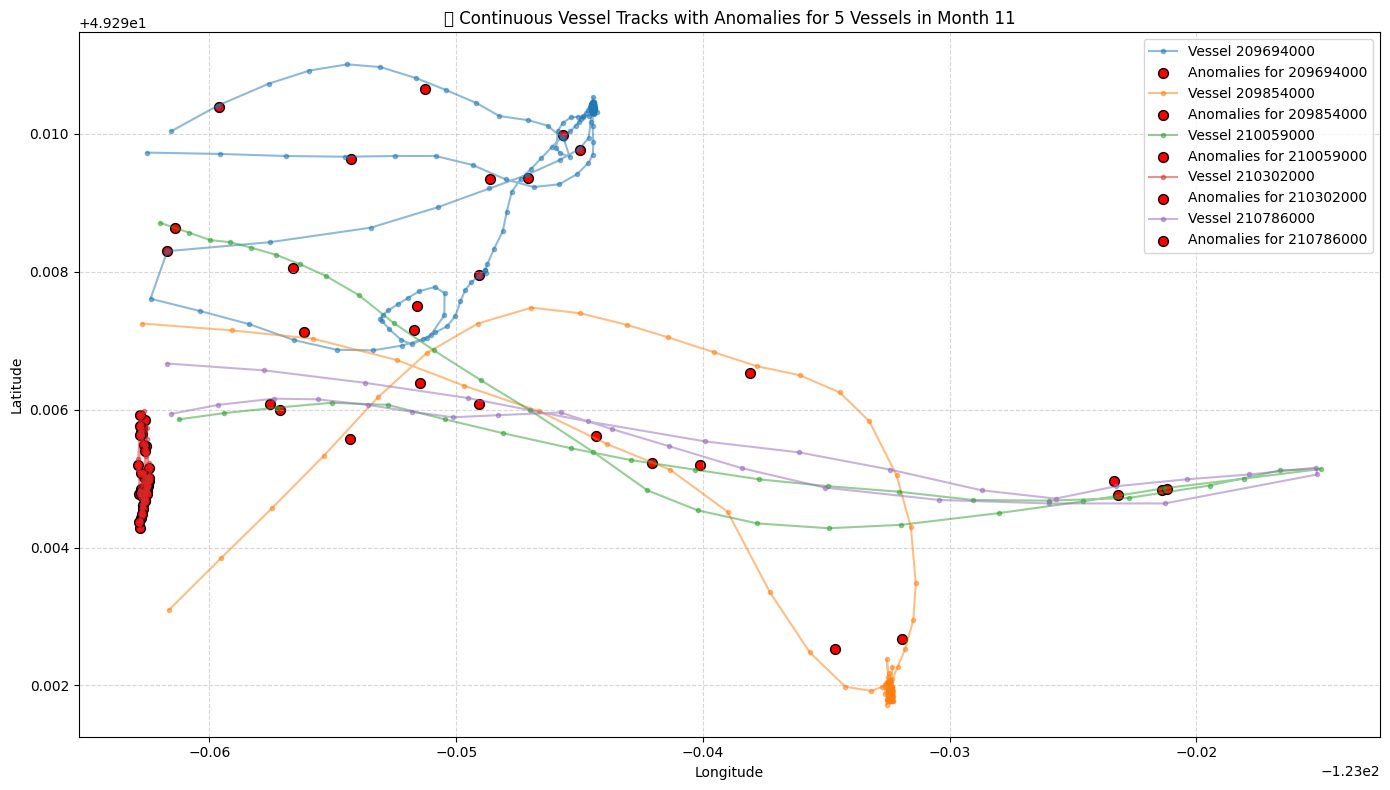

In [67]:
import matplotlib.pyplot as plt
import folium
import pandas as pd

# 1️⃣ Select a specific month for analysis (e.g., May = 5)
selected_month = 11  # Change this value for a different month

# 2️⃣ Ensure 'BaseDateTime' is in datetime format
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])
all_group_anomalies['BaseDateTime'] = pd.to_datetime(all_group_anomalies['BaseDateTime'])

# 3️⃣ Filter anomalies for the selected month
monthly_anomalies = all_group_anomalies[all_group_anomalies['BaseDateTime'].dt.month == selected_month]

# 4️⃣ Select 5 vessels with detected anomalies
selected_mmsis = monthly_anomalies['MMSI'].unique()[:5]  # Select first 5 MMSIs
print(f"🚢 Selected MMSIs for visualization: {selected_mmsis}")

# 5️⃣ Filter original data for the selected vessels and month
selected_vessel_tracks = df[(df['MMSI'].isin(selected_mmsis)) & 
                            (df['BaseDateTime'].dt.month == selected_month)]

# 🔵 6️⃣ Plot Continuous Vessel Tracks with Anomalies (Matplotlib)
plt.figure(figsize=(14, 8))

for mmsi in selected_mmsis:
    # Sort vessel data by timestamp
    vessel_data = selected_vessel_tracks[selected_vessel_tracks['MMSI'] == mmsi].sort_values(by='BaseDateTime')
    
    # Plot continuous vessel tracks
    plt.plot(vessel_data['LON'], vessel_data['LAT'],
             marker='o', markersize=3, linestyle='-', alpha=0.5, label=f'Vessel {mmsi}')
    
    # Highlight anomalies
    vessel_anomalies = monthly_anomalies[monthly_anomalies['MMSI'] == mmsi]
    plt.scatter(vessel_anomalies['LON'], vessel_anomalies['LAT'],
                color='red', s=50, edgecolor='black', label=f'Anomalies for {mmsi}')

# Plot Styling
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'🌊 Continuous Vessel Tracks with Anomalies for 5 Vessels in Month {selected_month}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

# 🌍 7️⃣ Plot Vessel Tracks on an Interactive Map (Folium)

# Dynamically center the map based on the selected vessel data
mean_lat = selected_vessel_tracks['LAT'].mean()
mean_lon = selected_vessel_tracks['LON'].mean()

# Initialize the Folium map
base_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=8, tiles='CartoDB positron')

# Plot vessel tracks and anomalies
for mmsi in selected_mmsis:
    # Sort vessel data by timestamp
    vessel_data = selected_vessel_tracks[selected_vessel_tracks['MMSI'] == mmsi].sort_values(by='BaseDateTime')
    
    # Extract vessel path as coordinate pairs
    track_coords = vessel_data[['LAT', 'LON']].values.tolist()
    
    # Plot vessel path as a PolyLine
    folium.PolyLine(track_coords, 
                    color='blue', 
                    weight=2, 
                    opacity=0.7, 
                    tooltip=f'Vessel {mmsi}').add_to(base_map)
    
    # Highlight anomalies on the map
    vessel_anomalies = monthly_anomalies[monthly_anomalies['MMSI'] == mmsi]
    
    for _, anomaly in vessel_anomalies.iterrows():
        folium.CircleMarker(
            location=[anomaly['LAT'], anomaly['LON']],
            radius=5,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.9,
            popup=f"Anomaly - MMSI: {anomaly['MMSI']}\nTime: {anomaly['BaseDateTime']}"
        ).add_to(base_map)

# 8️⃣ Display the interactive map
base_map
